In [1]:
import tensorflow as tf
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [7]:
print("this is data of the first movie:",train_data[0])


print("this is label of the first movie",train_labels[0])


this is data of the first movie: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
this is label of the first 

In [8]:
#The numbers above can convert to word like this
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decode_review =' '.join(
    [reverse_word_index.get(i-3,'?')for i in train_data[0]])

In [21]:
reverse_word_index[1]

'the'

In [16]:
#preparing the data
#encodin the integer sequence in to a binary matrix
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results


In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
y_train[1]

0.0

In [22]:
#Building Neural Network using keras

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
#Use this oppimizer and loss function to train model
model.compile(optimizer='rmsprop',
              loss = 'mse',
              metrics =['accuracy'])

In [24]:
#set train and test model
x_val = x_train[:10000]
partial_x_train =x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
#start train this model model.fit
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.0209 - acc: 0.9787 - val_loss: 0.0938 - val_acc: 0.8750
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.0159 - acc: 0.9831 - val_loss: 0.0957 - val_acc: 0.8758
Epoch 3/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.0131 - acc: 0.9859 - val_loss: 0.0987 - val_acc: 0.8755
Epoch 4/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.0076 - acc: 0.9933 - val_loss: 0.1082 - val_acc: 0.8686
Epoch 5/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.0108 - acc: 0.9877 - val_loss: 0.1028 - val_acc: 0.8726
Epoch 6/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.0048 - acc: 0.9954 - val_loss: 0.1047 - val_acc: 0.8719
Epoch 7/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.0081 - acc: 0.9913 - val_loss: 0.1070 - 

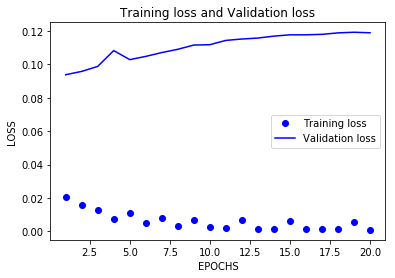

In [29]:
#Show how this model fit.
#How over or under fitting
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training loss and Validation loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()

plt.show()

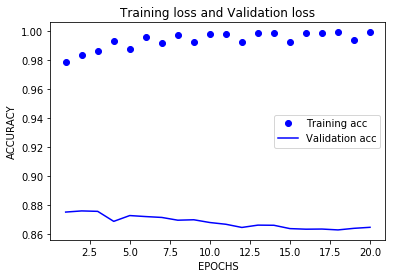

In [30]:
#Show the acuuracy
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training loss and Validation loss')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()

plt.show()

In [31]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 131us/step


In [32]:
results
#(loss,accuracy)

[0.13216716348469257, 0.84948]

In [34]:
#as the graph above From epochs= 4 the model start over fitting
#so we train ned model

from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(layers.Dense(16,activation = 'relu',input_shape=(10000,)))
model2.add(layers.Dense(16,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss = 'mse',
              metrics =['accuracy'])

history_2 = model2.fit(partial_x_train,partial_y_train,
                    epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 203us/step - loss: 0.1726 - acc: 0.7767 - val_loss: 0.1292 - val_acc: 0.8517
Epoch 2/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.0918 - acc: 0.9075 - val_loss: 0.0991 - val_acc: 0.8789
Epoch 3/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.0664 - acc: 0.9311 - val_loss: 0.0853 - val_acc: 0.8901
Epoch 4/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.0518 - acc: 0.9449 - val_loss: 0.0865 - val_acc: 0.8850


In [35]:
results = model2.evaluate(x_test,y_test)
results
#The accuracy and loss go down.

25000/25000 [==============================] - 3s 112us/step


[0.09211169433116913, 0.87648]